<a href="https://colab.research.google.com/github/rahcoderepo/NLP/blob/main/NLP-Assignment/RAH_NLP_Assignment_2_prep_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAI2300C - Fall 2024 - Professor Lee
NLP Assignment 2
Student: Roberto A Hernandez / 4000159004

GitHub Path (Use it to Save Colab File to GitHub):
RAH-Assignments/RAH_NLP_Assignment_2_prep_workshop.ipynb

GitHub Permalink:
https://github.com/rahcoderepo/NLP/blob/b6d8f96204f9ac8eb7957980c1bf34034504f651/NLP-Assignment/RAH_NLP_Assignment_2_prep_workshop.ipynb


## 000 - Initialization
         Cells:
         1 - Reset All Parameters  
         2 - Parameters Entry Form (No Entry will force defaults)
         3 - Define Function to Check for User defined parameters
         




In [75]:
# @title Reset All Parameters
Load_DataSet_Option = None # DataSet to load
words_to_remove = None
Run_X_y_Custom_Sort_Cell = None
reorder_X_y_sort_ascending = None
my_shuffle = None

In [76]:
# @title Parameters Entry Form
# Install ipywidgets if not already installed
import importlib.util
# Check if ipywidgets is installed
if importlib.util.find_spec("ipywidgets") is None:
    !pip install ipywidgets -qqq
else:
    print("ipywidgets is already installed.")

# Import libraries
# Check if ipywidgets and display are already imported
if 'widgets' not in globals():
    import ipywidgets as widgets
    from IPython.display import display
    print("Libraries imported.")
else:
    print("Libraries are already imported.")

print()
print()

# Define the input fields (7 parameters)
# Adding spacing and a note before Param 3
spacing_line = widgets.HTML(value="<br>")  # Simple line break

param1 = widgets.IntText(
    description="Load Data Set (1, 2 or 3):", value = "1",
    style={'description_width': 'initial'}  # Ensures full description display
)
note_for_param1 = widgets.HTML(
    value="""
    <div style="margin-left: 5px;">
        1 - Reduced size IMDB - RAH GitHub<br>
        2 - Full size IMDB - RAH GitHub (Combining 3 files)<br>
        3 - Amazon Fine Foods Reviews (RAH DropBox - Open Link)<br>
        4 - Tweeter Sentiment Analysis DataSet (RAH DropBox - Open Link)<br>
    </div>
    """
)

param2 = widgets.Checkbox(value=False,
    description="Run Custom Order Split Process (Yes/No):",
    style={'description_width': 'initial'}  # Ensures full description display
)

param3 = widgets.Checkbox(value=False,
    description="Custom Order Sort Mode Ascending (Yes/No):",
    style={'description_width': 'initial'}  # Ensures full description display
)

param4 = widgets.Checkbox(value=True,
    description="Use Custom Order Split Shuffle (Yes/No):",
    style={'description_width': 'initial'}  # Ensures full description display
)
note_for_param4 = widgets.HTML(
    value="""
    <div style="margin-left: 5px;">
        When running custom split with the intention to separate<br>
        tranning and testing data based on word count you should<br>
        prevent shuffling to make sure the split follows the new<br>
        sorting order
    </div>
    """
)

# Button to submit the form
submit_button = widgets.Button(description="Submit")

# Output widget to display the results
output = widgets.Output()

# Function to process the form inputs and set None for empty values
def process_inputs(b):
    global Load_DataSet_Option, Run_X_y_Custom_Sort_Cell, reorder_X_y_sort_ascending, my_shuffle  # Declare globals

    with output:
        output.clear_output()
        # Default to None if input is empty
        p1 = param1.value if param1.value else None
        p2 = param2.value if param2.value != '' else None
        p3 = param3.value if param3.value != '' else None
        p4 = param4.value if param4.value else None

        # Set the global variables dynamically
        Load_DataSet_Option = int(p1) if p1 is not None else None
        Run_X_y_Custom_Sort_Cell = p2
        reorder_X_y_sort_ascending = p3
        my_shuffle = p4

        # Display the updated values
        print()
        print("User defined the following parameters:")
        print(f"Load Data Set (1, 2 or 3): {Load_DataSet_Option}")
        print(f"Run Custom Order Split Process (Yes/No): {Run_X_y_Custom_Sort_Cell}")
        print(f"Custom Order Sort Mode Ascending (Yes/No): {reorder_X_y_sort_ascending}")
        print(f"Use Custom Order Split Shuffle (Yes/No): {my_shuffle}")


# Attach the form submission function to the button
submit_button.on_click(process_inputs)

# Display the form with extra lines
display(widgets.VBox([
    spacing_line,
    param1,
    note_for_param1,
    spacing_line,  # Add a blank line here
    param2,
    spacing_line,  # Add another blank line
    param3,
    spacing_line,  # Add a blank line here
    param4,
    note_for_param4,
    spacing_line,
    submit_button,
    output
]))




ipywidgets is already installed.
Libraries are already imported.




In [77]:
# @title Define Function to Check for User defined parameters
def set_parameter_value(var_name, default_value):
    """
    Sets a variable with a given name and default value.
    If the variable exists and its value is None, the default value is assigned.
    If the variable exists and is not None, it remains unchanged.
    """
    global_vars = globals() # Access the global symbol table
    # Check if the variable exists
    if var_name in global_vars:
        if global_vars[var_name] is None:  # If the value is NULL/None
            global_vars[var_name] = default_value
    else:
        # If the variable doesn't exist, create it with the default value
        global_vars[var_name] = default_value


# 001 - Code Block
        
        Cells:
        1 - Loading Libraries / Importing Packages
        2 - Import the Libraries
        3 - Loading the Dataset
        4 - Inspecting the DataSet - Relevant Information
        5 - Text Cleaning and Tokenization - Define Functions
        6 - Text Cleaning and Tokenization - Processing
        7 - Remove Words (Optional)
        8 - Converting Labels to Numeric Format
        9 - Explore X and y








In [78]:
# @title Loading Libraries / Importing Packages
# List of required libraries
libraries = {
    "tensorflow": "tensorflow",
    "numpy": "numpy",
    "pandas": "pandas",
    "matplotlib": "matplotlib",
    "sklearn": "scikit-learn",
    "transformers4450": "transformers>=4.45.0",
    "pillow": "pillow",
    "Pytorch": "torch torchvision torchaudio"
}

# Install only missing libraries
for lib_name, package_name in libraries.items():
    try:
        __import__(lib_name)
        print(f"{lib_name} is already installed.")
    except ImportError:
        print(f"{lib_name} is not installed. Installing now...")
        !pip install {package_name}



tensorflow is already installed.
numpy is already installed.
pandas is already installed.
matplotlib is already installed.
sklearn is already installed.
transformers4450 is not installed. Installing now...
pillow is not installed. Installing now...
Pytorch is not installed. Installing now...


In [79]:
# @title Import the Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from transformers import pipeline
import torch
from datetime import datetime
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
# @title Loading the Dataset
# (Must define which dataset to load, default is dataset #1 which is RAH reduced size IMDb movie reviews dataset from Kaggle saved to RAH GitHub)

#    Combines multiple CSV files into a single DataFrame.
def combine_csv_files(file_dict):
    """
    Parameters:
        file_dict (dict): A dictionary where keys are file order (integers) and values are CSV URLs.

    Returns:
        pd.DataFrame: A single DataFrame combining all the CSV files.
    """
    data_frames = []  # List to hold individual DataFrames

    # Iterate through the dictionary in the order of keys
    for file_order in sorted(file_dict.keys()):
        url = file_dict[file_order]
        print(f"Loading CSV file for key {file_order}: {url}")
        df = pd.read_csv(url)  # Load the CSV file
        data_frames.append(df)  # Append the DataFrame to the list

    # Combine all DataFrames into one
    combined_df = pd.concat(data_frames, ignore_index=True)  # Combine DataFrames
    print(f"Combined DataFrame has {len(combined_df)} records.")

    return combined_df


# A DataSet will be loaded using the following variables: # Load_DataSet_Option, main_data_field and senti_data_field
# main_data_field and senti_data_field variables allows us to reuse the same code for different datasets by storing
# the name of the relevant fields in the variables.

# Select the file_dict value for the dataset you are running
set_parameter_value("Load_DataSet_Option", 1) #Check for Parameters User Manual Entry

if Load_DataSet_Option == 1: # Default value (reduced size IMDB - RAH GitHub)
    #Only one URL (Small Set to Test)
    file_dict = {
        1: "https://raw.githubusercontent.com/rahcoderepo/NLP/refs/heads/main/DataSets/IMDB%20Dataset-GitHub-Ready-Less-Record.csv"
    }
    main_data_field = "review" # This is the field name where the data to be trained on is found
    senti_data_field = "sentiment" # This is the field name where the labels are found (Sentiment: Positive or Negative)

elif Load_DataSet_Option == 2:
    # Multiple URL (All 3 files that combined contains all data in IMDB Dataset)
    file_dict = {
        1: "https://raw.githubusercontent.com/rahcoderepo/NLP/refs/heads/main/DataSets/IMDB%20Dataset-GitHub-Ready-Less-Record.csv",
        2: "https://raw.githubusercontent.com/rahcoderepo/NLP/refs/heads/main/DataSets/IMDB%20Dataset-GitHub-Ready-Less-Record-002.csv",
        3: "https://raw.githubusercontent.com/rahcoderepo/NLP/refs/heads/main/DataSets/IMDB%20Dataset-GitHub-Ready-Less-Record-003.csv"
    }
    main_data_field = "review" # This is the field name where the data to be trained on is found
    senti_data_field = "sentiment" # This is the field name where the labels are found (Sentiment: Positive or Negative)
elif Load_DataSet_Option == 3:
    # Amazon Fine Foods Reviews (RAH DropBox - Open Link)
    file_dict = {
        1: "https://www.dropbox.com/scl/fi/o4rhjtirkovyzzzjxffs6/Amazon_Fine_Food_Reviews.csv?rlkey=va98n32bysip1pueke7uir3d0&st=p0hbleor&dl=1"
    }
    main_data_field = "Text" # This is the field name where the data to be trained on is found
    senti_data_field = "Sentiment" # This is the field name where the labels are found (Sentiment: Positive or Negative)
elif Load_DataSet_Option == 4:
    # Tweeter Sentiment Analysis DataSet (RAH DropBox - Open Link)
    file_dict = {
        1: "https://www.dropbox.com/scl/fi/7syewfa6lyup6hgwm3kp2/tweeter-sentiment-analysis-processed_file-20241212-1915.csv?rlkey=2t9x9dfbcupu9pvs3hfvoozk2&st=gatoqbbg&dl=1"
    }
    # Header Field Names are CASE sensitive !!!
    main_data_field = "TEXT" # This is the field name where the data to be trained on is found
    senti_data_field = "SENTIMENT" # This is the field name where the labels are found (Sentiment: Positive or Negative)

df = combine_csv_files(file_dict)

# Sample the loaded dataset
df.sample(5)


Loading CSV file for key 1: https://www.dropbox.com/scl/fi/7syewfa6lyup6hgwm3kp2/tweeter-sentiment-analysis-processed_file-20241212-1915.csv?rlkey=2t9x9dfbcupu9pvs3hfvoozk2&st=gatoqbbg&dl=1
Combined DataFrame has 1600000 records.


,TARGET,IDS,DATE,FLAG,USER,TEXT,SENTIMENT
875618,4,1680812299,Sat May 02 12:33:12 PDT 2009,NO_QUERY,mamalana122,gonna enjoy a little bit of sunshine,Negative
903974,4,1694727877,Mon May 04 03:53:28 PDT 2009,NO_QUERY,missgreens,http://twitpic.com/4jcjj - Boagsie actually is...,Negative
1325211,4,2015108092,Wed Jun 03 03:43:34 PDT 2009,NO_QUERY,tbateson,got sqlite working in my c# app,Negative
216341,0,1975685510,Sat May 30 15:40:57 PDT 2009,NO_QUERY,eLAYNAaAa,im reallly overly-emotional. i just cried caus...,Positive
284803,0,1993407102,Mon Jun 01 10:19:38 PDT 2009,NO_QUERY,JimmyChooAxtion,- can someone run with me to Newport ? Don't w...,Positive


In [81]:
# @title Inspecting the DataSet - Relevant Information

#Dataset relevant information

# Add columns to process these values
df['review_length'] = df[main_data_field].apply(len)  # Add a column for review lengths
df['word_count'] = df[main_data_field].apply(lambda x: len(x.split()))  # Add a column for word counts


# Find the record with the smallest len(main_data_field)
min_len_index = df['review_length'].idxmin()   # Get the index of the record with the min length
min_len_record = df.loc[min_len_index]         # Locate the record
print(f"Record index with the smallest len(review): {min_len_index}")
print(min_len_record)
print()

# Find the record with the largest len(main_data_field)
max_len_index = df['review_length'].idxmax()   # Get the index of the record with the max length
max_len_record = df.loc[max_len_index]         # Locate the record
print(f"Record index with the largest len(review): {max_len_index}")
print(max_len_record)
print()

# Find the record with the smallest number of words
min_word_count_index = df['word_count'].idxmin()                # Get the index of the record with the min word count
min_word_count_record = df.loc[min_word_count_index]            # Locate the record
print(f"\nRecord index with the smallest number of words in review: {min_word_count_index}")
print(min_word_count_record)
print()

# Find the record with the largest number of words
max_word_count_index = df['word_count'].idxmax()                # Get the index of the record with the max word count
max_word_count_record = df.loc[max_word_count_index]            # Locate the record
print(f"\nRecord index with the largest number of words in review: {max_word_count_index}")
print(max_word_count_record)
print()

# Combine the indices into a list
indices = [min_len_index, min_word_count_index, max_len_index, max_word_count_index]
# Display the selected records in the same format as df.sample()
display(df.loc[indices])


Record index with the smallest len(review): 4233
TARGET                                      0
IDS                                1468771833
DATE             Tue Apr 07 03:39:06 PDT 2009
FLAG                                 NO_QUERY
USER                               goldieloxx
TEXT                                    just 
SENTIMENT                            Positive
review_length                               6
word_count                                  1
Name: 4233, dtype: object

Record index with the largest len(review): 1295281
TARGET                                                           4
IDS                                                     2003659618
DATE                                  Tue Jun 02 06:55:50 PDT 2009
FLAG                                                      NO_QUERY
USER                                                GuroGreenBlooD
TEXT             @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
SENTIMENT                                                

,TARGET,IDS,DATE,FLAG,USER,TEXT,SENTIMENT,review_length,word_count
4233,0,1468771833,Tue Apr 07 03:39:06 PDT 2009,NO_QUERY,goldieloxx,just,Positive,6,1
135,0,1467842448,Mon Apr 06 22:28:05 PDT 2009,NO_QUERY,R_Boucher,Agh...snow!!!,Positive,14,1
1295281,4,2003659618,Tue Jun 02 06:55:50 PDT 2009,NO_QUERY,GuroGreenBlooD,@catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...,Negative,374,3
1080011,4,1968168246,Fri May 29 20:53:34 PDT 2009,NO_QUERY,CalBerkeley,? ? ? ? ? ? ? ?? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?...,Negative,136,64


In [82]:
# @title Text Cleaning and Tokenization - Define Functions

# Function to clean text (pre-defined)
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Removes specific words from a string - (Manual Definition to test the system)
def remove_words_from_string(input_string, words_to_remove):
    """
    Parameters:
        input_string (str): The string to process.
        words_to_remove (list): The list of words to remove.

    Returns:
        str: The string with specified words removed, or the original string if the list is empty.
    """
    # If the list is empty, return the original string
    if not words_to_remove:
        return input_string

    # Normalize case by making the list lowercase
    words_to_remove_set = set(word.lower() for word in words_to_remove)

    # Tokenize the input string and filter words
    filtered_words = [
        word for word in input_string.split()
        if word.lower() not in words_to_remove_set
    ]

    # Reconstruct and return the filtered string
    return ' '.join(filtered_words)

#     Prints a dictionary with a specified number of key-value pairs per line.
def print_dic_multiline(dictionary, items_per_line):
    """
    Parameters:
        dictionary (dict): The dictionary to display.
        items_per_line (int): Number of key-value pairs to display per line.
    """
    # Convert dictionary items to a list of tuples
    items = list(dictionary.items())

    # Iterate through the dictionary in chunks
    for i in range(0, len(items), items_per_line):
        # Print a slice of the dictionary items
        print(dict(items[i:i + items_per_line]))
    print()  # Blank line for better readability

#     Prints a nested list with a specified number of items per line.
def print_nested_list_multiline(nested_list, items_per_line):
    """
    Parameters:
        nested_list (list of lists): The nested list to display.
        items_per_line (int): Number of items to display per line.
    """
    for i, inner_list in enumerate(nested_list):
        print(f"Inner list {i}:")  # Label each inner list
        for j in range(0, len(inner_list), items_per_line):
            print(inner_list[j:j + items_per_line])  # Print chunks of the inner list
        print()  # Blank line for better readability

#     Prints the content of a string variable in multiple lines, with a specified number of characters per line.
def print_multiline(data, chars_per_line):
    """
    Parameters:
        data (str): The string to display.
        chars_per_line (int): The number of characters per line.
    """
    for i in range(0, len(data), chars_per_line):
        print(data[i:i + chars_per_line])



In [83]:
# @title Text Cleaning and Tokenization - Processing
# Define the record index variable
# Indexes for records with specific characteristics
# 2097 - very small number of words in the review field
# 14535 - very large number of words in the review field
record_index = 0  # Set to 0 for all records, or an integer for a specific record

#Define padding max number of words
pad_nbr_words = 24

#Define how many tuples per line to display when printing a dictionary
tuples_per_line = 8

#Defines how many items per line to display when printing a nested list
items_per_line = 18

#Defines number of charecters across when printing large string variables
characters_across = 120

#Defines number of key pairs in the ordered word_counts dict to display when tokenizing the entire data set
word_counts_sliced_pairs = 100

# List of words to remove manually (this is to test the system) - an empty list [] does nothing
# Example: words_to_remove = ['the', 'i', 'more', 'bad', 'good']
# words_to_remove = ['the','a','and']
# First Run
# if 'words_to_remove' not in globals():
#   words_to_remove = [] # Remove nothing
set_parameter_value("words_to_remove", [])

#Comparison Variables
original_data = ''
original_data_length = 0
cleaned_up_data = ''
cleaned_up_data_length = 0


# Record the start time and print the start message
start_time = datetime.now()
print(f"Process started at: {start_time}")
print("==================================")
print()

# Clean the reviews
if record_index == 0:
    # Process all records
    df['review'] = df[main_data_field].apply(clean_text)

    # Apply the function to all records in the 'review' column
    df[main_data_field] = df[main_data_field].apply(lambda main_data_field: remove_words_from_string(main_data_field, words_to_remove))

else:
    # Process a specific record
    original_data = str(df.loc[record_index, main_data_field]) # Hold Original Record Data
    original_data_length = len(original_data) #Hold Original Data Length Value
    df.loc[record_index, main_data_field] = clean_text(df.loc[record_index, main_data_field]) #Clen Up Single Record
    cleaned_up_data = str(df.loc[record_index, main_data_field]) # Hold cleaned up record data
    cleaned_up_data_length = len(cleaned_up_data) #Hold Cleaned Up Data Length Value
    cleaned_up_data_word_count = len(cleaned_up_data.split())


# Tokenization and padding
if record_index == 0:

    # Display time at this code line
    right_now_time = datetime.now()
    print(f"Tokenization and padding Process started at: {datetime.now()}")

    # Tokenize and pad all records
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts(df[main_data_field])

    sorted_word_counts = sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)
    # Convert it back to a dictionary
    sorted_word_counts_dict = dict(sorted_word_counts)
    # Slice the first 15 key-value pairs
    top_15_word_counts = dict(list(sorted_word_counts_dict.items())[:word_counts_sliced_pairs])  # Slicing first ? pairs
    # Use the print_dic_multiline function for display
    print_dic_multiline(top_15_word_counts, tuples_per_line)


    sequences = tokenizer.texts_to_sequences(df[main_data_field])
    padded_sequences = pad_sequences(sequences, maxlen= pad_nbr_words)

    # Display time at this code line
    right_now_time = datetime.now()
    print(f"Tokenization and padding Process ended at: {right_now_time}")

    # Check the shape of the padded_sequences
    print(f"Shape of padded_sequences: {padded_sequences.shape}")
    print()

else:
    #Display Original vs Cleaned Up Data
    print(f"Processed record at index {record_index} - Original Record Data - Length = {original_data_length}")
    print_multiline(original_data,characters_across)
    print()
    print(f"Processed record at index {record_index} - Cleaned Up Record Data - Length = {cleaned_up_data_length} - Difference = {cleaned_up_data_length - original_data_length}")
    print(f"Number of words is: {cleaned_up_data_word_count}")
    print_multiline(cleaned_up_data,characters_across)
    print()

    # Tokenize and pad a single record
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
    tokenizer.fit_on_texts([df.loc[record_index, main_data_field]])

    # Display the tokenized word index dictionary
    print(f"Processed record at index {record_index} - Tokenized Word Index:")
    print_dic_multiline(tokenizer.word_index,tuples_per_line)

    # Display the tokenized word count dictionary
    print(f"Processed record at index {record_index} - Tokenized Word Count:")
    # Display number of unique words in the corpus
    num_unique_words = len(tokenizer.word_counts)
    print(f"Number of unique words in the corpus: {num_unique_words}")
    # Display the total word occurrences in the corpus
    total_word_occurrences = sum(tokenizer.word_counts.values())
    print(f"Total word occurrences: {total_word_occurrences}")
    # Sort the word_counts dictionary by count in descending order
    sorted_word_counts = sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True)
    # Convert it back to a dictionary
    sorted_word_counts_dict = dict(sorted_word_counts)
    print_dic_multiline(sorted_word_counts_dict,tuples_per_line)

    sequences = tokenizer.texts_to_sequences([df.loc[record_index, main_data_field]])

    print(f"Processed record at index {record_index} - sequences:")
    print_nested_list_multiline(sequences, items_per_line)

    padded_sequences = pad_sequences(sequences, maxlen= pad_nbr_words)

# Print the result for clarity
if record_index == 0:

    print()
    sequence_lengths = [len(seq) for seq in sequences]
    print(f"Max sequence length: {max(sequence_lengths)}")
    print(f"Average sequence length: {sum(sequence_lengths)/len(sequence_lengths)}")
    print()

    # Calculate percentiles
    percentiles = np.percentile(sequence_lengths, [50, 75, 90, 95, 99])
    print(f"50th Percentile (Median): {percentiles[0]}")
    print(f"75th Percentile: {percentiles[1]}")
    print(f"90th Percentile: {percentiles[2]} - Recommended (variable pad_nbr_words is now set at {pad_nbr_words})")
    print(f"95th Percentile: {percentiles[3]}")
    print(f"99th Percentile: {percentiles[4]}")

    print()
    print("Processed all records.")
else:
    print(f"Processed record at index {record_index} - padded sequences:")
    print(padded_sequences)

# Record the end time and print the end message
print()
print("==================================")
end_time = datetime.now()
print(f"Process ended at: {end_time}")

# Calculate and display the total time taken
elapsed_time = end_time - start_time
print(f"Cell process lasted: {elapsed_time}")
print()


Process started at: 2024-12-13 01:13:20.667653

Tokenization and padding Process started at: 2024-12-13 01:13:28.269159
{'i': 771342, 'to': 565903, 'the': 524699, 'a': 382892, 'my': 316849, 'and': 303653, 'you': 274333, 'is': 238518}
{'it': 235484, 'in': 216653, 'for': 216403, 'of': 184013, 'on': 168367, 'me': 165897, 'so': 154137, 'have': 145578}
{'that': 143229, 'but': 133490, "i'm": 131341, 'just': 127080, 'with': 115326, 'be': 113060, 'at': 112411, 'not': 108694}
{'was': 104616, 'this': 94509, 'now': 93926, 'good': 91261, 'up': 91143, 'day': 86549, 'out': 82199, 'all': 82195}
{'get': 81968, 'like': 78564, 'are': 78098, 'no': 76695, 'go': 73922, 'quot': 72107, 'http': 71569, 'today': 67176}
{'do': 67139, "it's": 66444, 'too': 65774, 'your': 65400, 'work': 64922, 'love': 64813, 'going': 64599, 'got': 61287}
{'lol': 59197, 'time': 57825, 'back': 56914, 'from': 56215, 'u': 54917, 'one': 53697, 'what': 53589, 'com': 52708}
{'will': 52460, 'im': 52253, 'know': 51920, 'we': 51887, 'about'

In [54]:
# @title Remove Words (Optional)
def process_word_pairs(word_dict):
    """
    Process word pairs interactively.

    Parameters:
        word_dict (dict): Dictionary of word-frequency pairs.

    Returns:
        words_to_remove (list): List of words to include in the removal process.
    """
    new_words_to_remove = []  # List to hold words to remove
    pairs = list(word_dict.items())  # Convert dictionary to list of key-value pairs
    total_pairs = len(pairs)

    # Ask user how many pairs to process
    while True:
        try:
            num_pairs = int(input(f"How many word pairs would you like to process? (Max {total_pairs}): "))
            if 0 < num_pairs <= total_pairs:
                break
            else:
                print(f"Please enter a number between 1 and {total_pairs}.")
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    # Loop through the specified number of pairs
    for i in range(num_pairs):
        word, count = pairs[i]
        response = input(f"Pair {i+1}/{num_pairs} - Word: '{word}', Count: {count}. Include this word in the remove process? (Y/N): ").strip().upper()
        if response == 'Y':
            new_words_to_remove.append(word)
        elif response == 'N':
            continue
        else:
            print("Invalid response. Skipping to the next word.")

    print("\nProcessing complete.")
    print("Existing Words selected for removal: words_to_remove = ", words_to_remove)
    print("New Words selected for removal: new_words_to_remove = ", new_words_to_remove)
    return new_words_to_remove

# Call the function
new_words_to_remove = process_word_pairs(top_15_word_counts)
words_to_remove = words_to_remove + new_words_to_remove
print()
print("All Words selected for removal: words_to_remove = ", words_to_remove)
print()
print("To remove all these words re-run cell: Text Cleaning and Tokenization - Processing")


How many word pairs would you like to process? (Max 100): 5
Pair 1/5 - Word: 'i', Count: 771342. Include this word in the remove process? (Y/N): y
Pair 2/5 - Word: 'to', Count: 565903. Include this word in the remove process? (Y/N): n
Pair 3/5 - Word: 'the', Count: 524699. Include this word in the remove process? (Y/N): y
Pair 4/5 - Word: 'a', Count: 382892. Include this word in the remove process? (Y/N): y
Pair 5/5 - Word: 'my', Count: 316849. Include this word in the remove process? (Y/N): n

Processing complete.
Existing Words selected for removal: words_to_remove =  []
New Words selected for removal: new_words_to_remove =  ['i', 'the', 'a']

All Words selected for removal: words_to_remove =  ['i', 'the', 'a']

To remove all these words re-run cell: Text Cleaning and Tokenization - Processing


In [84]:
# @title Converting Labels to Numeric Format
# Convert sentiment labels to binary
# Modified to leave 0 and 1 as-is so that I can run it several times
df[senti_data_field] = df[senti_data_field].apply(lambda x: x if x in [0, 1] else (1 if x == 'positive' else 0))

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df[senti_data_field].values

#sample the data frame
df.sample(5)

,TARGET,IDS,DATE,FLAG,USER,TEXT,SENTIMENT,review_length,word_count,review
154043,0,1933084949,Tue May 26 22:57:32 PDT 2009,NO_QUERY,TPerky828,"Sad my babe is gone, loud thunder, and no tv. ...",0,74,16,sad my babe is gone loud thunder and no tv an...
909028,4,1751069674,Sat May 09 18:35:38 PDT 2009,NO_QUERY,jamiewatson,"@Bout14 Yeah, I only drank a little bit anywa...",0,96,18,bout yeah i only drank a little bit anyways i...
1311219,4,2013444134,Tue Jun 02 22:41:25 PDT 2009,NO_QUERY,wiseleo,@darlakrusee Have fun,0,22,3,darlakrusee have fun
540880,0,2199898651,Tue Jun 16 18:09:32 PDT 2009,NO_QUERY,christinadagger,Somebody... Anybody... PLEASE come and keep me...,0,138,24,somebody anybody please come and keep me compa...
1487655,4,2068332579,Sun Jun 07 13:54:14 PDT 2009,NO_QUERY,sadiiiii,him could be considered a broad term but i kno...,0,55,11,him could be considered a broad term but i kno...


In [85]:
# @title Explore X and y

start_index = 28920  # Starting record (manual selection)
show_this_many_records = 4  # Number of records to show (manual selection)
end_index = start_index + show_this_many_records

# Display records 20 to 24 for X (padded_sequences) with record numbers on separate lines
print(f"Records {start_index} to {end_index - 1} of X (padded_sequences):")
for i, record in enumerate(X[start_index:end_index], start=start_index):
    print(f"Record {i}:")  # Record number on its own line
    print(record)         # Content on the next line
    print() # extra line for reading clarity


# Display records 20 to 24 for y (sentiment values) with record numbers
print(f"\nRecords {start_index} to {end_index - 1} of y (sentiment):")
for i, sentiment in enumerate(y[start_index:end_index], start=start_index):
    print(f"Record {i}: {sentiment}")



Records 28920 to 28923 of X (padded_sequences):
Record 28920:
[  0   0   0   0   0   0   0   0   0   0   0   0   1   2 710   3  42  10
 431   5 147  24   4 728]

Record 28921:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1   83   61  791    3 2736    4  260]

Record 28922:
[   0    0    0    0    0    0    0    0    0  432 2976   66  139  423
   33   31    1    2  167  179   38    3  150  100]

Record 28923:
[   0    0    0    0    0   37 1166   80  173    2   46   14  634    4
  725  509    3   34 2150    7   25 5035   35    1]


Records 28920 to 28923 of y (sentiment):
Record 28920: 0
Record 28921: 0
Record 28922: 0
Record 28923: 0


# 002 - Code Block (Optional)

        Cells:
        1 - Define Functions - Reorder X and y based on the specified order field in the DataFrame.
        2 - Process - Reorder X and y based on the specified order field in the DataFrame.

Notes:
RAH word count - padded sequenced "fixed" split, this is done to test model training on either lower word count or higher word count by ordering the data in either ascending or descending order according to the word count and then preventing the randomness from affecting the train_test_split process

In [86]:
# @title Define Functions - Reorder X and y based on the specified order field in the DataFrame.
def reorder_X_y(df, order_field, ascending, X, y):
    """
    Parameters:
        df (pd.DataFrame): The DataFrame reference.
        order_field (str): The column name used for ordering.
        ascending (bool): The sort order (True for ascending, False for descending).
        X (list/array/DataFrame): The current features.
        y (list/array/Series): The current labels.

    Returns:
        tuple: X_new, y_new (reordered features and labels of the same type as input).
    """
    # Step 1: Verify the order field exists and contains integer values
    if order_field not in df.columns or not pd.api.types.is_integer_dtype(df[order_field]):
        print("Invalid order field. Returning the original X and y.")
        return X, y  # Return unchanged if the field is invalid

    # Step 2: Reorder the DataFrame based on the order_field and sort order
    df_sorted = df.sort_values(by=order_field, ascending=ascending).reset_index(drop=True)

    # Step 3: Determine the type of X and y, and reorder accordingly
    X_new = [X[i] for i in df_sorted.index]  # General default behavior
    y_new = [y[i] for i in df_sorted.index]

    # Preserve the type of X
    if isinstance(X, np.ndarray):
        X_new = np.array(X_new)
    elif isinstance(X, pd.DataFrame):
        X_new = pd.DataFrame(X_new, columns=X.columns if hasattr(X, "columns") else None)

    # Preserve the type of y
    if isinstance(y, np.ndarray):
        y_new = np.array(y_new)
    elif isinstance(y, pd.Series):
        y_new = pd.Series(y_new, name=y.name if hasattr(y, "name") else None)

    return X_new, y_new  # Return the reordered objects with the original types

In [87]:
# @title Process - Reorder X and y based on the specified order field in the DataFrame.
set_parameter_value("Run_X_y_Custom_Sort_Cell", False) # Run or Not
if Run_X_y_Custom_Sort_Cell:

    df_order_field = "word_count"
    set_parameter_value("reorder_X_y_sort_ascending", True) # Custom Order Sort Mode

    X_new, y_new = reorder_X_y(df, df_order_field , reorder_X_y_sort_ascending , X, y)

    # replace original X and y with newly reordered X_new and y_new
    X = X_new
    y = y_new

# 003 - Code Block

        Cells:
        1 - Splitting the Data into Training and Testing Sets (sklearn.model_selection.train_test_split)
        2 - Display Train/Test Arrays Shapes
        3- Building the Neural Network with TensorFlow
        4 - Visualizing Model Performance
        5 - Evaluating the Model
        


In [88]:
# @title Splitting the Data into Training and Testing Sets (sklearn.model_selection.train_test_split)

from sklearn.model_selection import train_test_split

my_test_size = 0.5
my_random_state = 42 # Becomes irrelevant when shuffle=False
#my_shuffle = True # Set to False for a deterministic split with 0 randomness / training data contains top portion and test data the bottom portion
set_parameter_value("my_shuffle", False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=my_test_size, shuffle=my_shuffle, random_state=my_random_state)

In [89]:
# @title Display Train/Test Arrays Shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("First record in X_train:")
print(X_train[0])  # First record in X_train

print("\nSecond record in X_test:")
print(X_test[1])  # Second record in X_test

print("\nFirst label in y_train:", y_train[0])
print("First label in y_test:", y_test[0])

print("\nSecond label in y_train:", y_train[1])
print("Second label in y_test:", y_test[1])

print("\nSummary of X_train:")
print("Max value:", np.max(X_train))
print("Min value:", np.min(X_train))
print("Mean value:", np.mean(X_train))

print("\nSummary of y_train:")
print("Unique labels:", np.unique(y_train, return_counts=True))

# Convert a subset of X_train to a DataFrame for inspection
X_train_df = pd.DataFrame(X_train[:5])
X_train_df.sample(5)

# print("\nFirst 5 records in X_train as DataFrame:")
# print(X_train_df)

# y_train_df = pd.DataFrame(y_train, columns=["Sentiment"])
# print("\nFirst 5 labels in y_train as DataFrame:")
# print(y_train_df.head())

# # Visualize label distribution
# plt.hist(y_train, bins=2, edgecolor='black')
# plt.title("Distribution of Labels in y_train")
# plt.xlabel("Label")
# plt.ylabel("Frequency")
# plt.show()




X_train shape: (800000, 24)
X_test shape: (800000, 24)
y_train shape: (800000,)
y_test shape: (800000,)
First record in X_train:
[   0    0    0    1   40  148   57    1  474  145    5 1222    8 3660
   49  829    1   13 1956   31    3   42   10  386]

Second record in X_test:
[   0    0    0    0    0    0    0    0    0    0    0   59  698   30
   22   55   13    6 3990  124  172  142  265  347]

First label in y_train: 0
First label in y_test: 0

Second label in y_train: 0
Second label in y_test: 0

Summary of X_train:
Max value: 9999
Min value: 0
Mean value: 343.0762490104167

Summary of y_train:
Unique labels: (array([0]), array([800000]))


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
4,0,0,0,1,37,43,25,1,24,33,...,2,92,218,2,70,69,8,33,136,87
1,0,0,0,9,819,18,112,70,566,194,...,7,300,552,86,5,2400,150,41,274,1171
2,0,0,0,0,0,0,1,2,1,322,...,1752,3,936,1165,4,494,38,32,13,1
3,0,0,0,0,0,0,0,0,0,0,...,6,451,852,505,3037,7,35,72,14,1170
0,0,0,0,1,40,148,57,1,474,145,...,49,829,1,13,1956,31,3,42,10,386


In [96]:
# @title Building the Neural Network with TensorFlow
# import tensorflow as tf # (Already Loaded)

#  tf.keras.layers.Embedding(10000, 16, input_length=200),
#  "input_length" deprecated, Keras can automatically infer the input length from the shape of the training data
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Record the start time and print the start message
start_time = datetime.now()
print(f"Process started at: {start_time}")
print("==================================")
print()

# Default is epochs = 10 / Use epochs = 1 to test that the code works
my_number_of_epochs = 1
my_validation_split = 0.4 # Independent from test_size in train_test_split
my_batch_size = 32

print()
print("Model training parameteres")
print("==========================")
print(f"Number of Epochs = {my_number_of_epochs}")
print(f"Model Validation Split = {my_validation_split} - This is independent from test_size in train_test_split")
print(f"Batch Size = {my_batch_size}")

history = model.fit(X_train, y_train, epochs=my_number_of_epochs, validation_split=my_validation_split, batch_size=my_batch_size)

# Record the end time and print the end message
print()
print("==================================")
end_time = datetime.now()
print(f"Process ended at: {end_time}")

# Calculate and display the total time taken
elapsed_time = end_time - start_time
print(f"Cell process lasted: {elapsed_time}")
print()


Process started at: 2024-12-13 01:23:01.542707


Model training parameteres
Number of Epochs = 1
Model Validation Split = 0.4 - This is independent from test_size in train_test_split
Batch Size = 32
15000/15000 ━━━━━━━━━━━━━━━━━━━━ 131s 9ms/step - accuracy: 0.9998 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 1.4675e-10

Process ended at: 2024-12-13 01:25:12.292974
Cell process lasted: 0:02:10.750267



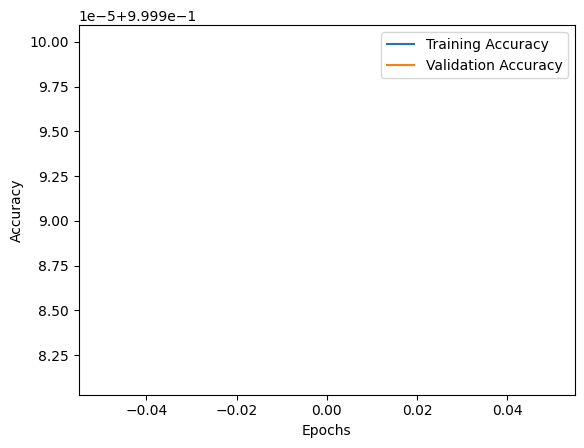

In [97]:
# @title Visualizing Model Performance
# import matplotlib.pyplot as plt # (Already Loaded)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [98]:
# @title Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


25000/25000 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 1.0000 - loss: 1.4672e-10
Test Accuracy: 1.0000, Test Loss: 0.0000


# 004 - Code Block

        Cells:
        1 - Making Predictions
        

In [99]:
# @title Making Predictions
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline.",
    "Mediocre movie plot, but the acting was great",
    "Great movie plot, but the acting was mediocre",
    "I like the first half and dislike  the second half",
    "the best movie ever",
    "the worst movie ever",
    "This is the worst movie I've ever seen, in my opinion",
    "I laughed the entire movie",
    "I laughed the entire movie, supper funny film",
    "I laughed the entire movie, supper funny film, my wife could not believe I was so happy",
    "My wife fell asleep after 5 minutes",
    "I couldn't take my eyes of the screen, plot was very intriguing",
    "I couldn't take my eyes of the screen, plot was very intriguing, great cast selection",
    "I couldn't take my eyes of the screen, plot was very intriguing, great cast selection, director did a great job",
    "I couldn't take my eyes of the screen, plot was very intriguing, I liked the actors very much",
    "After this film I am never coming to the movies again ever",
    "too long, plot and acting just ok, not my type of movie",
    "I don't know, I don't know, I just really don't know"
]

sample_reviews = [
    "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
    "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
    "@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds",
    "my whole body feels itchy and like its on fire ",
    "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
    "@Kwesidei not the whole crew ",
    "Need a hug ",
    "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
    "2Hood4Hollywood","@Tatiana_K nope they didn't have it ",
    "@twittera que me muera ? ",
    "spring break in plain city... it's snowing ",
    "I just re-pierced my ears ",
    "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
    "@octolinz16 It it counts, idk why I did either. you never talk to me anymore ",
    "@smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.",
    "@iamjazzyfizzle I wish I got to watch it with you!! I miss you and @iamlilnicki  how was the premiere?!",
    "Hollis' death scene will hurt me severely to watch on film  wry is directors cut not out now?",
    "about to file taxes ",
    "@LettyA ahh ive always wanted to see rent  love the soundtrack!!",
    "@FakerPattyPattz Oh dear. Were you drinking out of the forgotten table drinks? ",
    "@alydesigns i was out most of the day so didn't get much done "
]

#Calibrating sample review - use to adjust the prob split from Negative to Positive Outcome
#Comment it to run the model on the real sample reviews values shown above
# sample_reviews = [
#     "the best movie ever",
#     "the worst movie ever",
#     "I have nothing to say",
#     "I have a lot to say",
#     "I loved the first half and hated the second half",
#     "I hated the first half and loved the second half"
# ]

#Calibrating sample review - use to adjust the prob split from Negative to Positive Outcome
#Comment it to run the model on the real sample reviews values shown above
# sample_reviews = [
#     "great good wonderful adorable sweet nice delicious healthy",
#     "super healthy option",
#     "the best doggie food ever",
#     "the worst doggie food ever",
#     "I have nothing to say",
#     "I have a lot to say",
#     "I loved the first cup and and hated the second cup",
#     "I hated the first cup and loved the second cup"
# ]

pos_neg_split = 0.42

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=pad_nbr_words)

predictions = model.predict(sample_padded)

# print('Original Display Format')
# print(["Positive" if prob > 0.4 else "Negative" for prob in predictions])
# print()

print()
print()
print(f"Results Displayed at: {datetime.now()}")
print()

print("User defined parameters:")
print("========================")
print(f"Load Data Set (1, 2 or 3): {Load_DataSet_Option}")
print(f"Run Custom Order Split Process (Yes/No): {Run_X_y_Custom_Sort_Cell}")
print(f"Custom Order Sort Mode Ascending (Yes/No): {reorder_X_y_sort_ascending}")
print(f"Use Custom Order Split Shuffle (Yes/No): {my_shuffle}")

print()
print('Process Details:')
print('================')
print(f"Padding Recommendation: {percentiles[2]} - 90th Percentile")
print(f'Sequence Padding: {pad_nbr_words}')
print(f'Words to remove: {words_to_remove}')
print()
print('Train, Test, Split Info')
print('=======================')
print(f'Test Split Size: {my_test_size}')
print(f'Split Shuffle: {my_shuffle}')
print()


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Default is epochs = 10 / Use epochs = 1 to test that the code works
print()
print("Model training parameteres")
print("==========================")
print(f"Number of Epochs = {my_number_of_epochs}")
print(f"Model Validation Split = {my_validation_split} - This is independent from test_size in train_test_split")
print(f"Batch Size = {my_batch_size}")

print()
print('Test Loss and Accuracy')
print(f'Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')
print()
print(f'Positive/Negative Split = {pos_neg_split}')
print()
# Combine predictions with reviews prob > 0.5 default
result = [
    (prob[0], f"{'P' if prob > pos_neg_split else 'N'}-{prob[0]:.2f}: {review}")
    for review, prob in zip(sample_reviews, predictions)
]

# Sort results by probability in ascending order
result_sorted = sorted(result, key=lambda x: x[0])

# Print each result on a separate line
for _, item in result_sorted:
    print(item)
print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


Results Displayed at: 2024-12-13 01:27:41.925337

User defined parameters:
Load Data Set (1, 2 or 3): 4
Run Custom Order Split Process (Yes/No): True
Custom Order Sort Mode Ascending (Yes/No): True
Use Custom Order Split Shuffle (Yes/No): False

Process Details:
Padding Recommendation: 24.0 - 90th Percentile
Sequence Padding: 24
Words to remove: []

Train, Test, Split Info
Test Split Size: 0.5
Split Shuffle: False

X_train shape: (800000, 24)
X_test shape: (800000, 24)
y_train shape: (800000,)
y_test shape: (800000,)

Model training parameteres
Number of Epochs = 1
Model Validation Split = 0.4 - This is independent from test_size in train_test_split
Batch Size = 32

Test Loss and Accuracy
Test Loss: 0.00, Test Accuracy: 1.00

Positive/Negative Split = 0.42

N-0.00: 2Hood4Hollywood
N-0.00: @smarrison i would've been the first, but i didn't have a gun.    not really though, zac snyder's just a doucheclown.
N-0.00: @twittera que me muera ? 
N-0.00: